In [1]:
import calendar as cld
def fn(date_str):
    yr=date_str.split('-')[0][2:]
    mth=int(date_str.split('-')[1])
    return cld.month_name[mth][:3]+' '+yr

In [2]:
import matplotlib.pyplot as plt
def gen_line_graph(d): 
    x = list(range(len(d)))
    y = list(d.values())
    plt.figure(figsize=(14, 4))
    ax = plt.axes() 
    ax.set_facecolor('#e8e8e8')
    plt.plot(x, y, marker='o', markersize=4, markeredgecolor='black')
    plt.xticks(x, d.keys(), rotation=748)
    max_key = y.index(max(y))
    plt.axvline(x=max_key, linestyle='--', color='red')
    plt.grid(True, color='lightgray', linestyle='--', linewidth=1) 
    return plt.show

In [12]:
import pandas as pd
df=pd.read_csv('./owid-covid-data.csv')
df=df[['continent', 'date', 'new_cases']]

In [11]:
df.continent.unique()

array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [13]:
df['date_mod']=df['date'].apply(fn)

In [28]:
cases = df.groupby(['continent', 'date_mod'])['new_cases'].sum()
d_Africa=cases['Africa'].to_dict()
d_NorthAmerica=cases['North America'].to_dict()
d_SouthAmerica=cases['South America'].to_dict()
d_Asia=cases['Asia'].to_dict()
d_Europe=cases['Europe'].to_dict()
d_Oceania=cases['Oceania'].to_dict()

In [30]:
from datetime import datetime, timedelta
def gen_str(start_year=2020, start_month=1, end_year=2023, end_month=3):
    start_date = datetime(start_year, start_month, 1)
    end_date = datetime(end_year, end_month, 1)
    l=[]
    while start_date <= end_date:
        l.append(start_date.strftime('%b %y'))
        start_date += timedelta(days=32)
        start_date = start_date.replace(day=1)
    return l

l=gen_str()
d_Afr={}
d_Nam={}
d_Sam={}
d_As={}
d_Eur={}
d_Oce={}

for i in l:
    d_Afr[i]=0
    d_Nam[i]=0
    d_Sam[i]=0
    d_As[i]=0
    d_Eur[i]=0
    d_Oce[i]=0

for i in d_Africa.keys():
    d_Afr[i]=d_Africa[i]

for i in d_NorthAmerica.keys():
    d_Nam[i]=d_NorthAmerica[i]

for i in d_SouthAmerica.keys():
    d_Sam[i]=d_SouthAmerica[i]

for i in d_Asia.keys():
    d_As[i]=d_Asia[i]

for i in d_Europe.keys():
    d_Eur[i]=d_Europe[i]

for i in d_Oceania.keys():
    d_Oce[i]=d_Oceania[i]

In [33]:
def scale(lst):
    min_val = min(lst)
    max_val = max(lst)
    scaled_lst = [(val - min_val) / (max_val - min_val) for val in lst]
    return scaled_lst

<function matplotlib.pyplot.show(close=None, block=None)>

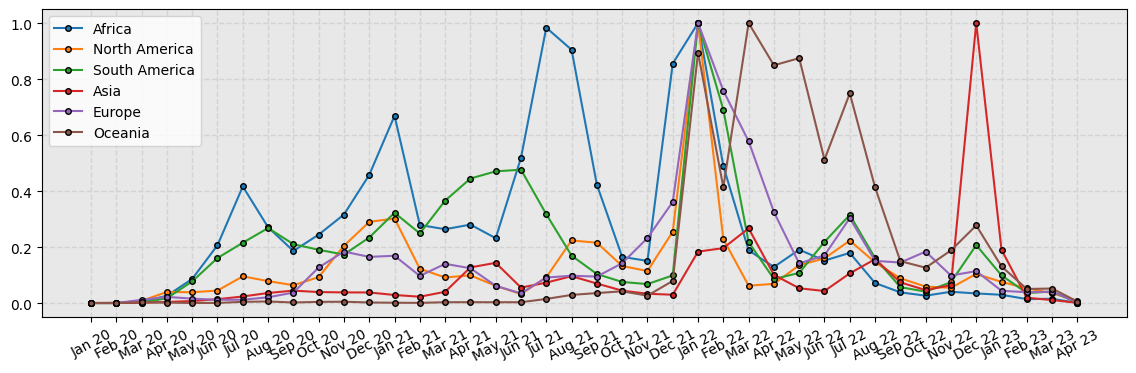

In [34]:
# gen_line_graph(d)
x_Afr = list(range(len(d_Afr)))
y_Afr = list(d_Afr.values())
y_Afr = scale(y_Afr)

x_Nam = list(range(len(d_Nam)))
y_Nam = list(d_Nam.values())
y_Nam = scale(y_Nam)

x_Sam = list(range(len(d_Sam)))
y_Sam = list(d_Sam.values())
y_Sam=scale(y_Sam)

x_As = list(range(len(d_As)))
y_As = list(d_As.values())
y_As=scale(y_As)

x_Eur = list(range(len(d_Eur)))
y_Eur = list(d_Eur.values())
y_Eur=scale(y_Eur)

x_Oce = list(range(len(d_Oce)))
y_Oce = list(d_Oce.values())
y_Oce=scale(y_Oce)

plt.figure(figsize=(14, 4))
ax = plt.axes() 
ax.set_facecolor('#e8e8e8')
plt.plot(x_Afr, y_Afr, marker='o', markersize=4, markeredgecolor='black', label='Africa')
plt.plot(x_Nam, y_Nam, marker='o', markersize=4, markeredgecolor='black', label='North America')
plt.plot(x_Sam, y_Sam, marker='o', markersize=4, markeredgecolor='black', label='South America')
plt.plot(x_As, y_As, marker='o', markersize=4, markeredgecolor='black', label='Asia')
plt.plot(x_Eur, y_Eur, marker='o', markersize=4, markeredgecolor='black', label='Europe')
plt.plot(x_Oce, y_Oce, marker='o', markersize=4, markeredgecolor='black', label='Oceania')
plt.legend()
plt.xticks(x_Afr, d_Afr.keys(), rotation=748)
# max_key = y.index(max(y))
# plt.axvline(x=max_key, linestyle='--', color='red')
plt.grid(True, color='lightgray', linestyle='--', linewidth=1) 
plt.show

In [8]:
pd.DataFrame(d, index=[0]).to_csv('owid.csv', index=False)